Naive Bayes Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
training_names = open(r'word_indices_labels.txt', "r")
df_column_names = pd.read_csv(training_names, sep = ' ', header = None, encoding = 'latin-1', low_memory = False)
list_names = df_column_names[0].tolist()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving training_data.csv to training_data.csv


In [ ]:
data = r"training_data.csv"
training_df = pd.read_csv(data, header=None, names=list_names)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving training_labels.txt to training_labels.txt


In [ ]:
training_labels = r"training_labels.txt"
training_class_df = pd.read_csv(training_labels, header=None, names=["class_label"])
training_class_series = training_class_df.squeeze()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving testing_data.csv to testing_data.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving testing_labels.txt to testing_labels.txt


In [ ]:
data = r"testing_data.csv"
testing_df = pd.read_csv(data, header=None, names=list_names)
test_labels = r"testing_labels.txt"
testing_class_df = pd.read_csv(test_labels, header=None, names=["class"])
testing_class_series = testing_class_df.squeeze()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#sc = StandardScaler()
mms = MinMaxScaler()
training_mms_df = mms.fit_transform(training_df)
testing_mms_df = mms.transform(testing_df)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(training_mms_df, training_class_series)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(testing_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix = confusion_matrix(testing_class_series, y_pred)
accuracyScore = accuracy_score(testing_class_series,y_pred)

In [ ]:
confusionMatrix

array([[1076,   11],
       [  33,  686]])

In [ ]:
accuracyScore

0.9756367663344407

Logit Classifier

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [ ]:
x_train = training_mms_df
y_train = training_class_series

x_test = testing_mms_df
y_test = testing_class_series

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.99
Error rate: 0.01


Feature Selection

In [ ]:
x = training_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
training_norm_df = pd.DataFrame(x_scaled, columns=list_names)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
threshold = 1000
mi_features = []
feature_scores = mutual_info_classif(training_norm_df, training_class_series, random_state=0)
for score, f_name in sorted(zip(feature_scores, training_norm_df.columns), reverse=True)[:threshold]:
        print(f_name, score)
        mi_features.append(f_name)
training_mi_df = training_df[mi_features]
testing_mi_df = testing_df[mi_features]
print(training_mi_df.columns)

vs 0.2908803848062531
ct 0.2710858258639093
net 0.19573976864992026
shr 0.1845145411844884
qtr 0.14946580170559498
rev 0.11166557258545873
acquir 0.10342366847748141
loss 0.094488260863419
bui 0.08013342739697538
mln 0.07696129646034033
note 0.07019659274775503
offer 0.06719827114852395
year 0.06651949196398954
sell 0.06437532222457909
profit 0.059677302933086596
div 0.0592635126641301
dividend 0.05817648929028785
th 0.056049242010873135
record 0.05431994975450971
acquisi 0.05300843502312058
agre 0.0524816454440038
stake 0.04883108485119858
compani 0.04873543406362413
bid 0.04486369133985191
mth 0.044218307604843465
merger 0.044012168008053854
agreem 0.04392275892298847
pct 0.04329527481501283
prior 0.04208289611344895
tender 0.041564148487768016
avg 0.041374656980172064
complet 0.0385760985149739
unit 0.037793972862865566
purchas 0.03736685071393353
common 0.037348462164118246
qtly 0.03694009342099758
washington 0.036369452263472324
propos 0.03627860956881679
firm 0.03546002605832821


In [ ]:
import time
start = time.time()
classifier = MultinomialNB()
classifier.fit(training_mi_df, training_class_series)
y_pred_for_trainingData = classifier.predict(training_mi_df)
y_pred_for_testingData  =  classifier.predict(testing_mi_df)
cm_mi = confusion_matrix(testing_class_series, y_pred)
ac_test = accuracy_score(testing_class_series, y_pred_for_testingData)
ac_train = accuracy_score(training_class_series, y_pred_for_trainingData)
print('Training Accuracy:', ac_train)
print('Testing Accuracy: {:.2f}'.format(accuracy_score(testing_class_series, y_pred_for_testingData)))
stop = time.time()
print(f"Training time: {stop - start}s")

Training Accuracy: 0.9531698696708637
Testing Accuracy: 0.98
Training time: 0.11525440216064453s


In [ ]:
import time
start = time.time()
reg = LogisticRegression(solver='newton-cg')
reg.fit(training_mi_df, training_class_series)
y_pred_testing = reg.predict(testing_mi_df)
y_pred_training = reg.predict(training_mi_df)
#cm_mi = confusion_matrix(testing_class_series, y_pred)
ac_test = accuracy_score(testing_class_series, y_pred_testing)
ac_train = accuracy_score(training_class_series, y_pred_training)
print('Training Accuracy:', ac_train)
print('Accuracy: {:.2f}'.format(accuracy_score(testing_class_series, y_pred_testing)))
stop = time.time()
print(f"Training time: {stop - start}s")

Training Accuracy: 0.9927104042412194
Accuracy: 0.98
Training time: 2.9280483722686768s


In [ ]:
from sklearn.feature_selection import mutual_info_classif
threshold = 100 # the number of most relevant features
mi2_features = []
feature_scores = mutual_info_classif(training_norm_df, training_class_series, random_state=0)
for score, f_name in sorted(zip(feature_scores, training_norm_df.columns), reverse=True)[:threshold]:
        print(f_name, score)
        mi2_features.append(f_name)
training_mi2_df = training_df[mi2_features]
testing_mi2_df = testing_df[mi2_features]
print(training_mi2_df.columns)

vs 0.2908803848062531
ct 0.2710858258639093
net 0.19573976864992026
shr 0.1845145411844884
qtr 0.14946580170559498
rev 0.11166557258545873
acquir 0.10342366847748141
loss 0.094488260863419
bui 0.08013342739697538
mln 0.07696129646034033
note 0.07019659274775503
offer 0.06719827114852395
year 0.06651949196398954
sell 0.06437532222457909
profit 0.059677302933086596
div 0.0592635126641301
dividend 0.05817648929028785
th 0.056049242010873135
record 0.05431994975450971
acquisi 0.05300843502312058
agre 0.0524816454440038
stake 0.04883108485119858
compani 0.04873543406362413
bid 0.04486369133985191
mth 0.044218307604843465
merger 0.044012168008053854
agreem 0.04392275892298847
pct 0.04329527481501283
prior 0.04208289611344895
tender 0.041564148487768016
avg 0.041374656980172064
complet 0.0385760985149739
unit 0.037793972862865566
purchas 0.03736685071393353
common 0.037348462164118246
qtly 0.03694009342099758
washington 0.036369452263472324
propos 0.03627860956881679
firm 0.03546002605832821


In [ ]:
training_mi2 = pd.concat([training_mi2_df, training_class_df], axis=1)
training_mi2

,vs,ct,net,shr,qtr,rev,acquir,loss,bui,mln,...,saskatchewan,giorgio,pariba,pan,district,howard,unveil,swap,base,class_label
0,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,3,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,6,5,2,2,1,2,0,4,0,6,...,0,0,0,0,0,0,0,0,0,0
4523,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4524,3,0,1,1,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4525,3,2,1,1,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import BernoulliNB
df = training_mi2.sample(n = 20)
training_mi2 = training_mi2.drop(df.index)
nb_train_accuracy = []
lr_train_accuracy = []
nb_test_accuracy = []
lr_test_accuracy = []
data = [20]


print(df.shape)
training_class_short = df['class_label']
training_class_short_series = training_class_short.squeeze()
classifier = BernoulliNB()
x = df.drop('class_label', axis=1)
classifier.fit(x, training_class_short_series)
y_pred_for_trainingData = classifier.predict(x)
y_pred_for_testingData  = classifier.predict(testing_mi2_df)
ac_test = accuracy_score(testing_class_series, y_pred_for_testingData)
ac_train = accuracy_score(training_class_short_series, y_pred_for_trainingData)
nb_train_accuracy.append(ac_train)
nb_test_accuracy.append(ac_test)


reg = LogisticRegression(solver='newton-cg')
reg.fit(x, training_class_short_series)
y_pred_testing = reg.predict(testing_mi2_df)
y_pred_training = reg.predict(x)
ac_test_lr = accuracy_score(testing_class_series, y_pred_testing)
ac_train_lr = accuracy_score(training_class_short_series, y_pred_training)
lr_test_accuracy.append(ac_test_lr)
lr_train_accuracy.append(ac_train_lr)

(20, 101)


In [ ]:
n=20
i = 4507
while i >= 50:
    i -= 50
    df2 = training_mi2.sample(n = 50)
    training_mi2 = training_mi2.drop(df2.index)
    df = pd.concat([df,df2])
    training_class_short = df['class_label']
    training_class_short_series = training_class_short.squeeze()
    print(training_class_short_series)
    classifier = BernoulliNB()
    x = df.drop('class_label', axis=1)
    classifier.fit(x, training_class_short_series)
    y_pred_for_trainingData = classifier.predict(x)
    y_pred_for_testingData  = classifier.predict(testing_mi2_df)
    #cm_mi = confusion_matrix(testing_class_series, y_pred)
    ac_test = accuracy_score(testing_class_series, y_pred_for_testingData)
    ac_train = accuracy_score(training_class_short_series, y_pred_for_trainingData)

    n += 50
    data.append(n)
    nb_train_accuracy.append(ac_train)
    nb_test_accuracy.append(ac_test)

    reg = LogisticRegression(solver='newton-cg')
    reg.fit(x, training_class_short_series)
    y_pred_testing = reg.predict(testing_mi2_df)
    y_pred_training = reg.predict(x)
    ac_test_lr = accuracy_score(testing_class_series, y_pred_testing)
    ac_train_lr = accuracy_score(training_class_short_series, y_pred_training)

    lr_test_accuracy.append(ac_test_lr)
    lr_train_accuracy.append(ac_train_lr)


1860    0
3358    0
899     1
1214    1
23      1
       ..
184     1
713     1
2173    0
2862    0
2670    0
Name: class_label, Length: 70, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
2294    0
2964    0
3132    0
2       1
1742    0
Name: class_label, Length: 120, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
1890    0
1493    1
1386    1
2920    0
2466    0
Name: class_label, Length: 170, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
2470    0
4478    0
40      1
1354    1
2610    0
Name: class_label, Length: 220, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
3013    0
2314    0
332     1
2193    0
2826    0
Name: class_label, Length: 270, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
1650    0
3128    0
4477    0
314     1
2897    0
Name: class_label, Length: 320, dtype: int64
1860    0
3358    0
899     1
1214    1
23      1
       ..
1480    1
4

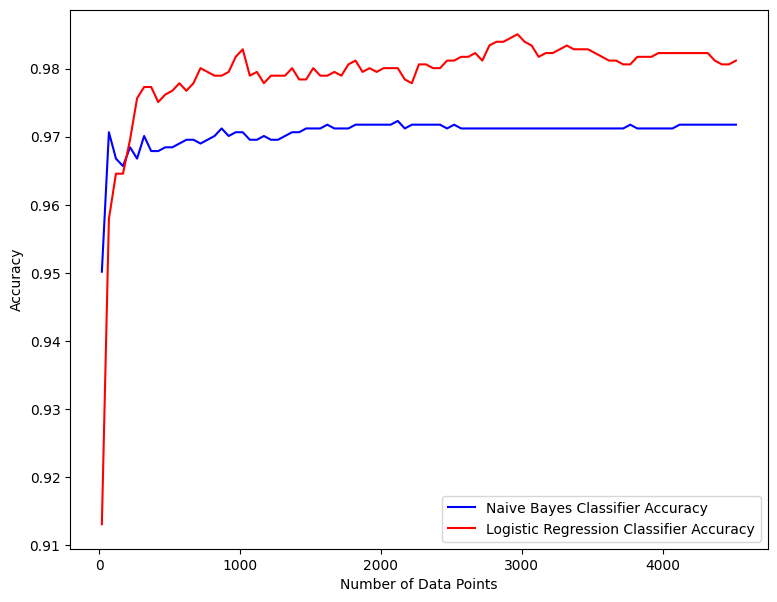

In [ ]:
plot_df = pd.DataFrame()
plot_df['Number of Data Points'] = data
plot_df['Logistic Regression Classifier Accuracy'] = lr_test_accuracy
plot_df['Naive Bayes Classifier Accuracy'] = nb_test_accuracy

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=[9, 7])
# Plot another line on the same chart/graph
plt.plot(plot_df['Number of Data Points'], plot_df['Naive Bayes Classifier Accuracy'], 'b', label='Naive Bayes Classifier Accuracy')
plt.plot(plot_df['Number of Data Points'], plot_df['Logistic Regression Classifier Accuracy'], 'r', label='Logistic Regression Classifier Accuracy')
ax.set_xlabel('Number of Data Points')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()